In [1]:
import sys, os
sys.path.append(os.path.join(sys.path[0].split('Documents')[0],'Documents/BecaNLP/Utils'))

import NLPUtils as nlp
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to /home/lestien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Cargamos el dataset

,Pregunta,Intencion
0,como puedo trabajar en santander rio,102
1,pagar tarjeta visa querer reintegro,350
2,pagar tarjeta naranja sistema,132
3,no se debitó la primera cuota del plan de bien...,129
4,abonar tarjeta credito,342


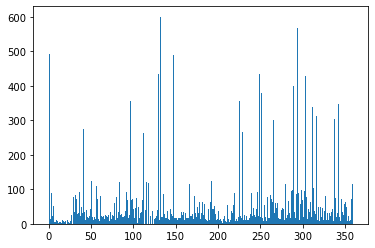

In [2]:
df = pd.read_csv('../train.csv',sep = '|')
df['Intencion'] = df.Intencion.str.findall(r'\d+').apply(lambda x: int(x[0]))
categories = set(df['Intencion'].values)
name2idx = {name:idx for idx, name in enumerate(categories)}
idx2name = {idx:name for idx, name in enumerate(categories)}
_ = plt.hist(df['Intencion'].values,bins=max(df['Intencion']))
df.head()

# Intentamos con BERT otra vez

In [4]:
from utils import *

# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=2018, 
                                                          batch_size=64, 
                                                          do_lower_case=True)

len(train_dataloader) * 13

3679

In [5]:
from utils import *

# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=2018, 
                                                          batch_size=64, 
                                                          do_lower_case=True)

# Cargamos el modelo
use_gpu = True
config = BertConfig(vocab_size=31002, 
                    hidden_size=768, 
                    num_hidden_layers=12, 
                    num_attention_heads=12, 
                    intermediate_size=3072, 
                    hidden_act='gelu', 
                    hidden_dropout_prob=0.1, 
                    attention_probs_dropout_prob=0.1, 
                    max_position_embeddings=512, 
                    type_vocab_size=2, 
                    initializer_range=0.02, 
                    layer_norm_eps=1e-12, 
                    pad_token_id=0, 
                    gradient_checkpointing=False, 
                    num_labels=np.max(df['Intencion'].values)+1)
model, device = load_classification_model(use_gpu, config)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]/home/lestien/anaconda3/envs/nlpenv-gpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
Epoch:   8%|▊         | 1/12 [02:50<31:19, 170.84s/it]

{'accuracy': 0.48483341621084036, 'balanced_accuracy': 0.1715946732258943}


Epoch:  17%|█▋        | 2/12 [05:42<28:31, 171.14s/it]

{'accuracy': 0.6205867727498757, 'balanced_accuracy': 0.3216779608574524}


Epoch:  25%|██▌       | 3/12 [08:34<25:42, 171.40s/it]

{'accuracy': 0.712083540527101, 'balanced_accuracy': 0.4442423321379605}


Epoch:  33%|███▎      | 4/12 [11:26<22:53, 171.63s/it]

{'accuracy': 0.7518647439085032, 'balanced_accuracy': 0.5256797432090513}


Epoch:  42%|████▏     | 5/12 [14:19<20:02, 171.83s/it]

{'accuracy': 0.7981103928393833, 'balanced_accuracy': 0.6208285342023284}


Epoch:  50%|█████     | 6/12 [17:11<17:11, 172.00s/it]

{'accuracy': 0.8224763799104923, 'balanced_accuracy': 0.6849727826101095}


Epoch:  58%|█████▊    | 7/12 [20:04<14:20, 172.14s/it]

{'accuracy': 0.8349080059671805, 'balanced_accuracy': 0.7313658972898538}


Epoch:  67%|██████▋   | 8/12 [22:56<11:28, 172.23s/it]

{'accuracy': 0.8538040775733466, 'balanced_accuracy': 0.776251647211076}


Epoch:  75%|███████▌  | 9/12 [25:48<08:36, 172.32s/it]

{'accuracy': 0.8538040775733466, 'balanced_accuracy': 0.7936300965149412}


Epoch:  83%|████████▎ | 10/12 [28:41<05:44, 172.36s/it]

{'accuracy': 0.8647439085032322, 'balanced_accuracy': 0.8062047522503618}


Epoch:  92%|█████████▏| 11/12 [31:33<02:52, 172.38s/it]

{'accuracy': 0.860765788165092, 'balanced_accuracy': 0.8024051356573243}


Epoch: 100%|██████████| 12/12 [34:26<00:00, 172.20s/it]

{'accuracy': 0.8642466434609647, 'balanced_accuracy': 0.8043381057519218}


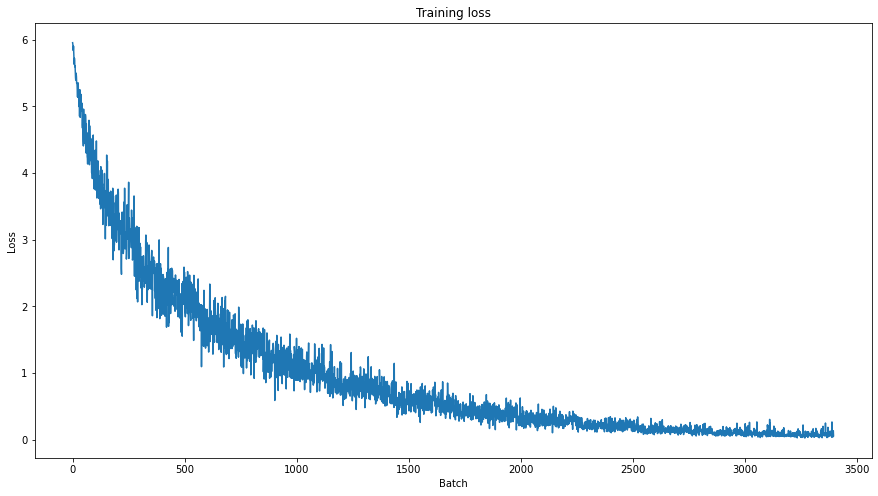

In [6]:
train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.5803083043262058, 'balanced_accuracy': 0.2793453450038328}


Epoch:  17%|█▋        | 2/12 [06:20<31:41, 190.11s/it]

{'accuracy': 0.7294878170064645, 'balanced_accuracy': 0.4946395922699897}


Epoch:  25%|██▌       | 3/12 [09:32<28:35, 190.58s/it]

{'accuracy': 0.7966185977125808, 'balanced_accuracy': 0.639756075068407}


Epoch:  33%|███▎      | 4/12 [12:44<25:27, 190.96s/it]

{'accuracy': 0.8274490303331675, 'balanced_accuracy': 0.7087600102885163}


Epoch:  42%|████▏     | 5/12 [15:56<22:18, 191.28s/it]

{'accuracy': 0.8478368970661363, 'balanced_accuracy': 0.768627628418034}


Epoch:  50%|█████     | 6/12 [19:08<19:08, 191.48s/it]

{'accuracy': 0.8453505718547986, 'balanced_accuracy': 0.7700727107080518}


Epoch:  58%|█████▊    | 7/12 [22:19<15:57, 191.46s/it]

{'accuracy': 0.8642466434609647, 'balanced_accuracy': 0.8070672848365185}


Epoch:  67%|██████▋   | 8/12 [25:30<12:45, 191.38s/it]

{'accuracy': 0.8627548483341622, 'balanced_accuracy': 0.8143655523864555}


Epoch:  75%|███████▌  | 9/12 [28:41<09:33, 191.28s/it]

{'accuracy': 0.8667329686723023, 'balanced_accuracy': 0.8124695705541949}


Epoch:  83%|████████▎ | 10/12 [31:52<06:22, 191.20s/it]

{'accuracy': 0.8707110890104426, 'balanced_accuracy': 0.8221724592258465}


Epoch:  92%|█████████▏| 11/12 [35:03<03:11, 191.10s/it]

{'accuracy': 0.8667329686723023, 'balanced_accuracy': 0.820313568130853}


Epoch: 100%|██████████| 12/12 [38:14<00:00, 191.23s/it]

{'accuracy': 0.8547986076578816, 'balanced_accuracy': 0.806272945454662}


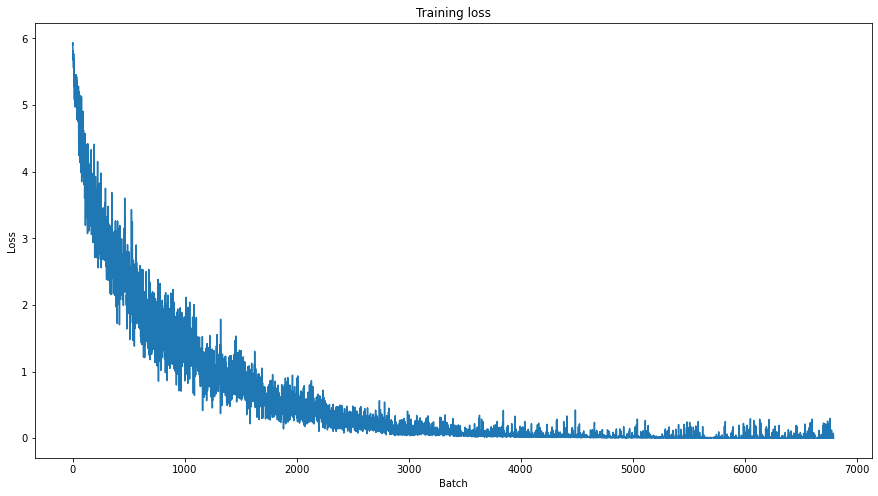

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.5982098458478369, 'balanced_accuracy': 0.2978854527288886}


Epoch:  17%|█▋        | 2/12 [06:24<32:04, 192.42s/it]

{'accuracy': 0.722526106414719, 'balanced_accuracy': 0.4885351004473512}


Epoch:  25%|██▌       | 3/12 [09:37<28:52, 192.46s/it]

{'accuracy': 0.7866732968672302, 'balanced_accuracy': 0.6188860887011989}


Epoch:  33%|███▎      | 4/12 [12:50<25:40, 192.50s/it]

{'accuracy': 0.836399801093983, 'balanced_accuracy': 0.7352354057956197}


Epoch:  42%|████▏     | 5/12 [16:02<22:27, 192.50s/it]

{'accuracy': 0.8547986076578816, 'balanced_accuracy': 0.782029221322811}


Epoch:  50%|█████     | 6/12 [19:14<19:14, 192.48s/it]

{'accuracy': 0.8592739930382894, 'balanced_accuracy': 0.8039160123909456}


Epoch:  58%|█████▊    | 7/12 [22:27<16:01, 192.37s/it]

{'accuracy': 0.8687220288413725, 'balanced_accuracy': 0.8221602911702472}


Epoch:  67%|██████▋   | 8/12 [25:38<12:48, 192.18s/it]

{'accuracy': 0.8712083540527101, 'balanced_accuracy': 0.8328314051940973}


Epoch:  75%|███████▌  | 9/12 [28:50<09:35, 191.96s/it]

{'accuracy': 0.8771755345599205, 'balanced_accuracy': 0.8275920891415103}


Epoch:  83%|████████▎ | 10/12 [32:01<06:23, 191.78s/it]

{'accuracy': 0.8776727996021879, 'balanced_accuracy': 0.8327483255890656}


Epoch:  92%|█████████▏| 11/12 [35:13<03:11, 191.66s/it]

{'accuracy': 0.8677274987568374, 'balanced_accuracy': 0.8158233034284312}


Epoch: 100%|██████████| 12/12 [38:24<00:00, 192.05s/it]

{'accuracy': 0.8707110890104426, 'balanced_accuracy': 0.8277945163937148}


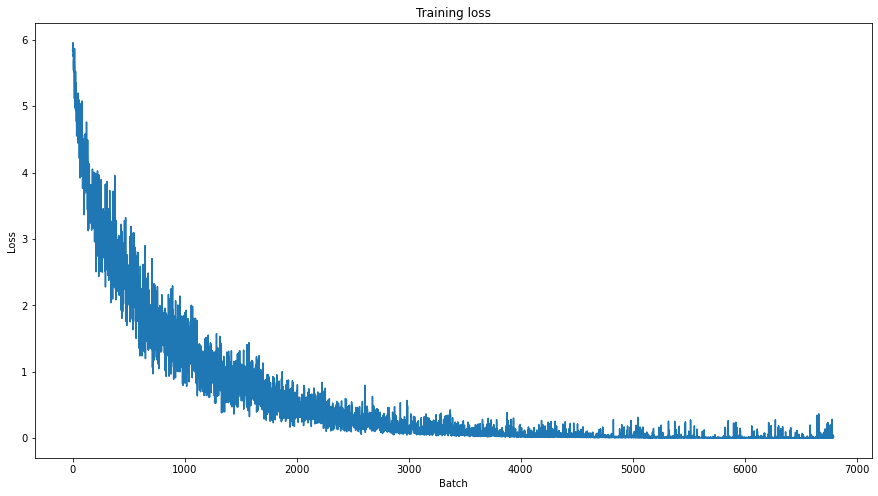

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.5803083043262058, 'balanced_accuracy': 0.2833654062175028}


Epoch:  17%|█▋        | 2/12 [06:25<32:07, 192.73s/it]

{'accuracy': 0.7284932869219294, 'balanced_accuracy': 0.4891705738773303}


Epoch:  25%|██▌       | 3/12 [09:38<28:54, 192.73s/it]

{'accuracy': 0.7896568871208354, 'balanced_accuracy': 0.6083533914647427}


Epoch:  33%|███▎      | 4/12 [12:51<25:42, 192.76s/it]

{'accuracy': 0.8279462953754351, 'balanced_accuracy': 0.7204509446159097}


Epoch:  42%|████▏     | 5/12 [16:03<22:29, 192.78s/it]

{'accuracy': 0.8428642466434609, 'balanced_accuracy': 0.7651896981292052}


Epoch:  50%|█████     | 6/12 [19:16<19:16, 192.79s/it]

{'accuracy': 0.8543013426156141, 'balanced_accuracy': 0.7867353387656829}


Epoch:  58%|█████▊    | 7/12 [22:29<16:03, 192.71s/it]

{'accuracy': 0.859771258080557, 'balanced_accuracy': 0.7930483466521222}


Epoch:  67%|██████▋   | 8/12 [25:41<12:49, 192.47s/it]

{'accuracy': 0.8657384385877673, 'balanced_accuracy': 0.8153768529952006}


Epoch:  75%|███████▌  | 9/12 [28:52<09:36, 192.21s/it]

{'accuracy': 0.8612630532073595, 'balanced_accuracy': 0.8027537078091608}


Epoch:  83%|████████▎ | 10/12 [32:04<06:23, 191.96s/it]

{'accuracy': 0.8672302337145699, 'balanced_accuracy': 0.8108244829983272}


Epoch:  92%|█████████▏| 11/12 [35:15<03:11, 191.81s/it]

{'accuracy': 0.8632521133764296, 'balanced_accuracy': 0.8061011525321168}


Epoch: 100%|██████████| 12/12 [38:27<00:00, 192.26s/it]

{'accuracy': 0.8552958727001492, 'balanced_accuracy': 0.8062721914373688}


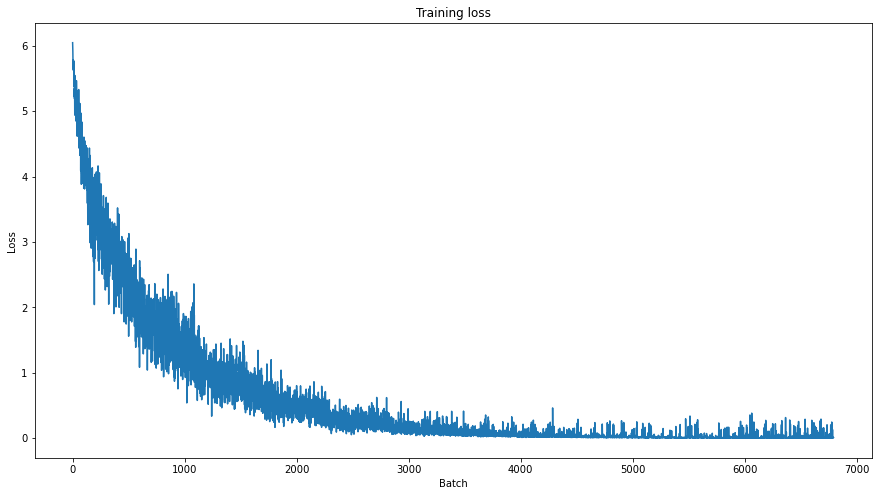

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.555942317255097, 'balanced_accuracy': 0.24925603593126724}


Epoch:  17%|█▋        | 2/12 [06:25<32:06, 192.61s/it]

{'accuracy': 0.7021382396817504, 'balanced_accuracy': 0.43196026998092035}


Epoch:  25%|██▌       | 3/12 [09:37<28:53, 192.59s/it]

{'accuracy': 0.7662854301342615, 'balanced_accuracy': 0.5632458777279946}


Epoch:  33%|███▎      | 4/12 [12:50<25:40, 192.61s/it]

{'accuracy': 0.8050721034311288, 'balanced_accuracy': 0.6503583516420243}


Epoch:  42%|████▏     | 5/12 [16:03<22:28, 192.60s/it]

{'accuracy': 0.8498259572352064, 'balanced_accuracy': 0.7434327147944606}


Epoch:  50%|█████     | 6/12 [19:15<19:15, 192.63s/it]

{'accuracy': 0.8557931377424167, 'balanced_accuracy': 0.7770702658265223}


Epoch:  58%|█████▊    | 7/12 [22:28<16:03, 192.65s/it]

{'accuracy': 0.859771258080557, 'balanced_accuracy': 0.795335617350533}


Epoch:  67%|██████▋   | 8/12 [25:40<12:50, 192.59s/it]

{'accuracy': 0.8587767279960219, 'balanced_accuracy': 0.8031842977299289}


Epoch:  75%|███████▌  | 9/12 [28:52<09:37, 192.42s/it]

{'accuracy': 0.8672302337145699, 'balanced_accuracy': 0.8179942732541273}


Epoch:  83%|████████▎ | 10/12 [32:04<06:24, 192.19s/it]

{'accuracy': 0.8707110890104426, 'balanced_accuracy': 0.8415019329381982}


Epoch:  92%|█████████▏| 11/12 [35:16<03:12, 192.01s/it]

{'accuracy': 0.8707110890104426, 'balanced_accuracy': 0.832119062180372}


Epoch: 100%|██████████| 12/12 [38:27<00:00, 192.30s/it]

{'accuracy': 0.8746892093485827, 'balanced_accuracy': 0.8413948973785512}


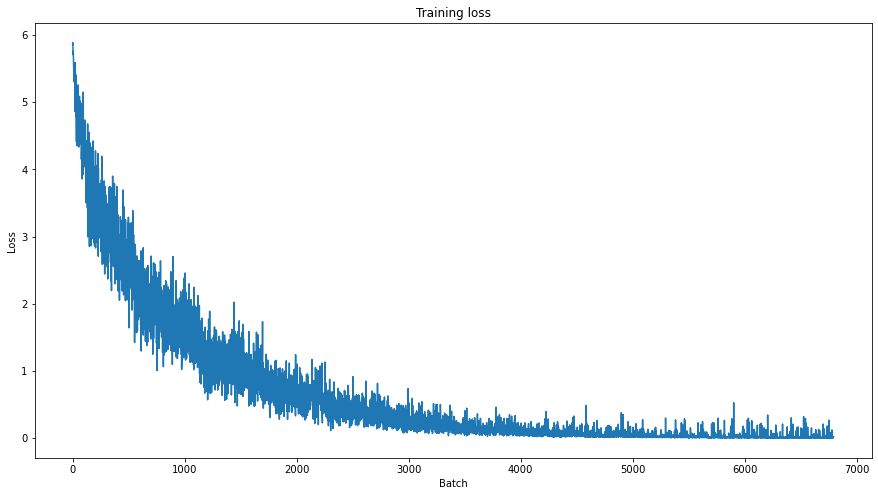

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.5062158130283441, 'balanced_accuracy': 0.1953501900889464}


Epoch:  17%|█▋        | 2/12 [06:25<32:05, 192.59s/it]

{'accuracy': 0.6539035305818001, 'balanced_accuracy': 0.35945260994648465}


Epoch:  25%|██▌       | 3/12 [09:38<28:54, 192.68s/it]

{'accuracy': 0.7449030333167578, 'balanced_accuracy': 0.5278309197686272}


Epoch:  33%|███▎      | 4/12 [12:50<25:41, 192.71s/it]

{'accuracy': 0.7881650919940328, 'balanced_accuracy': 0.6210327688392496}


Epoch:  42%|████▏     | 5/12 [16:03<22:29, 192.75s/it]

{'accuracy': 0.8214818498259573, 'balanced_accuracy': 0.6997977023207194}


Epoch:  50%|█████     | 6/12 [19:16<19:16, 192.80s/it]

{'accuracy': 0.8319244157135753, 'balanced_accuracy': 0.7336211135394048}


Epoch:  58%|█████▊    | 7/12 [22:29<16:04, 192.81s/it]

{'accuracy': 0.843858776727996, 'balanced_accuracy': 0.772833762234374}


Epoch:  67%|██████▋   | 8/12 [25:42<12:51, 192.84s/it]

{'accuracy': 0.8543013426156141, 'balanced_accuracy': 0.7680052681993302}


Epoch:  75%|███████▌  | 9/12 [28:55<09:38, 192.87s/it]

{'accuracy': 0.8657384385877673, 'balanced_accuracy': 0.8212837264177755}


Epoch:  83%|████████▎ | 10/12 [32:07<06:25, 192.77s/it]

{'accuracy': 0.8637493784186971, 'balanced_accuracy': 0.8143457985237655}


Epoch:  92%|█████████▏| 11/12 [35:19<03:12, 192.54s/it]

{'accuracy': 0.8662357036300348, 'balanced_accuracy': 0.8179134285651006}


Epoch: 100%|██████████| 12/12 [38:31<00:00, 192.65s/it]

{'accuracy': 0.868224763799105, 'balanced_accuracy': 0.8134840767763042}


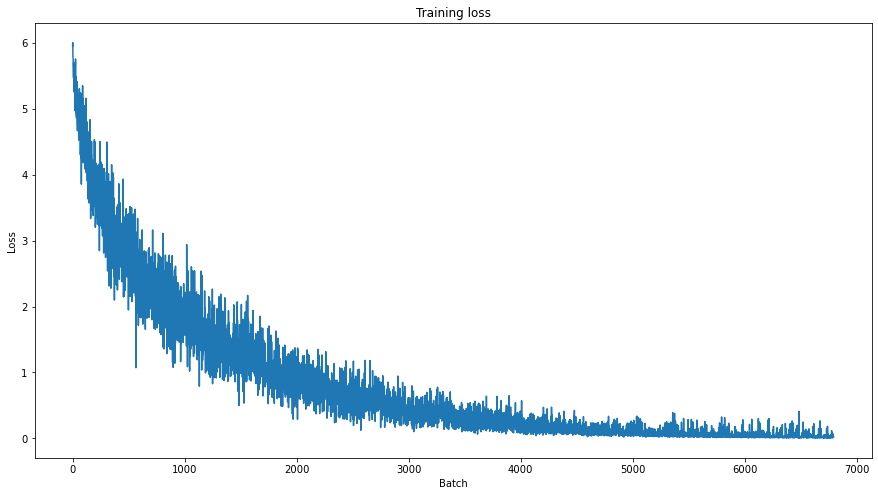

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.41869716558925907, 'balanced_accuracy': 0.117033877483556}


Epoch:  17%|█▋        | 2/12 [06:25<32:07, 192.74s/it]

{'accuracy': 0.56539035305818, 'balanced_accuracy': 0.22870990532869043}


Epoch:  25%|██▌       | 3/12 [09:38<28:55, 192.79s/it]

{'accuracy': 0.6424664346096469, 'balanced_accuracy': 0.3387286516227857}


Epoch:  33%|███▎      | 4/12 [12:51<25:42, 192.85s/it]

{'accuracy': 0.6956737941322725, 'balanced_accuracy': 0.41047017400135594}


Epoch:  42%|████▏     | 5/12 [16:04<22:30, 192.87s/it]

{'accuracy': 0.7429139731476877, 'balanced_accuracy': 0.5003913583970818}


Epoch:  50%|█████     | 6/12 [19:17<19:17, 192.85s/it]

{'accuracy': 0.7797115862754849, 'balanced_accuracy': 0.5765101376459025}


Epoch:  58%|█████▊    | 7/12 [22:29<16:04, 192.84s/it]

{'accuracy': 0.8060666335156639, 'balanced_accuracy': 0.6439886078674907}


Epoch:  67%|██████▋   | 8/12 [25:42<12:51, 192.82s/it]

{'accuracy': 0.8229736449527598, 'balanced_accuracy': 0.6804604382355627}


Epoch:  75%|███████▌  | 9/12 [28:55<09:38, 192.82s/it]

{'accuracy': 0.8304326205867727, 'balanced_accuracy': 0.7217977804610041}


Epoch:  83%|████████▎ | 10/12 [32:08<06:25, 192.82s/it]

{'accuracy': 0.8493286921929388, 'balanced_accuracy': 0.7603768530409513}


Epoch:  92%|█████████▏| 11/12 [35:21<03:12, 192.80s/it]

{'accuracy': 0.8503232222774739, 'balanced_accuracy': 0.7580038497802692}


Epoch: 100%|██████████| 12/12 [38:33<00:00, 192.81s/it]

{'accuracy': 0.8587767279960219, 'balanced_accuracy': 0.7948254181551805}


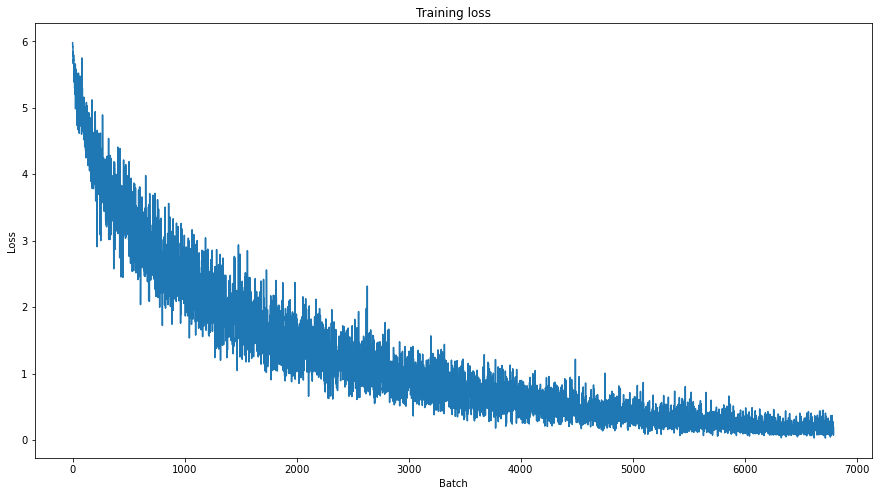

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.04823470909995027, 'balanced_accuracy': 0.008198692205454074}


Epoch:  17%|█▋        | 2/12 [06:25<32:06, 192.65s/it]

{'accuracy': 0.06166086524117355, 'balanced_accuracy': 0.009636284508788366}


Epoch:  25%|██▌       | 3/12 [09:37<28:53, 192.63s/it]

{'accuracy': 0.09646941819990054, 'balanced_accuracy': 0.015911559453128544}


Epoch:  33%|███▎      | 4/12 [12:50<25:41, 192.63s/it]

{'accuracy': 0.11934361014420686, 'balanced_accuracy': 0.02004713144111003}


Epoch:  42%|████▏     | 5/12 [16:03<22:28, 192.62s/it]

{'accuracy': 0.14669318746892093, 'balanced_accuracy': 0.024753624887658317}


Epoch:  50%|█████     | 6/12 [19:15<19:15, 192.62s/it]

{'accuracy': 0.15713575335653904, 'balanced_accuracy': 0.026828746486291098}


Epoch:  58%|█████▊    | 7/12 [22:28<16:03, 192.61s/it]

{'accuracy': 0.19741422178020884, 'balanced_accuracy': 0.03531897664567278}


Epoch:  67%|██████▋   | 8/12 [25:40<12:50, 192.58s/it]

{'accuracy': 0.2242665340626554, 'balanced_accuracy': 0.044366581946057485}


Epoch:  75%|███████▌  | 9/12 [28:53<09:37, 192.55s/it]

{'accuracy': 0.24714072600696171, 'balanced_accuracy': 0.05185814409599411}


Epoch:  83%|████████▎ | 10/12 [32:05<06:25, 192.51s/it]

{'accuracy': 0.2814520139234212, 'balanced_accuracy': 0.0598942552037381}


Epoch:  92%|█████████▏| 11/12 [35:18<03:12, 192.54s/it]

{'accuracy': 0.31327697662854304, 'balanced_accuracy': 0.07262956735465519}


Epoch: 100%|██████████| 12/12 [38:30<00:00, 192.58s/it]

{'accuracy': 0.35405271009448036, 'balanced_accuracy': 0.0872397552216799}


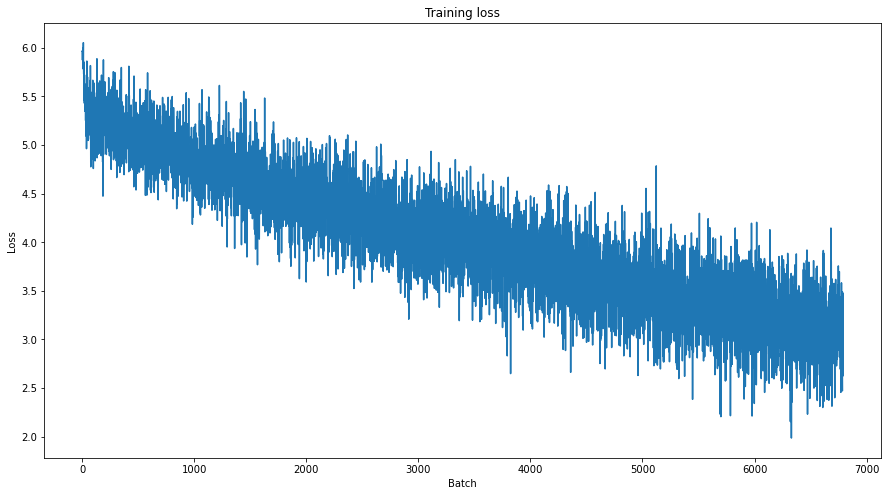

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.02486325211337643, 'balanced_accuracy': 0.0029842590841266834}


Epoch:  17%|█▋        | 2/12 [06:25<32:05, 192.59s/it]

{'accuracy': 0.022874191944306316, 'balanced_accuracy': 0.0027933247741267412}


Epoch:  25%|██▌       | 3/12 [09:37<28:53, 192.60s/it]

{'accuracy': 0.023371456986573842, 'balanced_accuracy': 0.002892682026180106}


Epoch:  33%|███▎      | 4/12 [12:50<25:40, 192.62s/it]

{'accuracy': 0.022874191944306316, 'balanced_accuracy': 0.003081457663451233}


Epoch:  42%|████▏     | 5/12 [16:03<22:28, 192.69s/it]

{'accuracy': 0.024365987071108902, 'balanced_accuracy': 0.003279715699329847}


Epoch:  50%|█████     | 6/12 [19:16<19:16, 192.75s/it]

{'accuracy': 0.019890601690701143, 'balanced_accuracy': 0.0025735548243586825}


Epoch:  58%|█████▊    | 7/12 [22:29<16:04, 192.86s/it]

{'accuracy': 0.02536051715564396, 'balanced_accuracy': 0.003215434083601286}


Epoch:  67%|██████▋   | 8/12 [25:42<12:51, 192.93s/it]

{'accuracy': 0.022376926902038786, 'balanced_accuracy': 0.0032749791592235323}


Epoch:  75%|███████▌  | 9/12 [28:55<09:38, 192.96s/it]

{'accuracy': 0.02536051715564396, 'balanced_accuracy': 0.003215434083601286}


Epoch:  83%|████████▎ | 10/12 [32:08<06:25, 192.98s/it]

{'accuracy': 0.023868722028841372, 'balanced_accuracy': 0.003215434083601286}


Epoch:  92%|█████████▏| 11/12 [35:21<03:13, 193.02s/it]

{'accuracy': 0.02187966185977126, 'balanced_accuracy': 0.003215434083601286}


Epoch: 100%|██████████| 12/12 [38:34<00:00, 192.88s/it]

{'accuracy': 0.023868722028841372, 'balanced_accuracy': 0.003215434083601286}


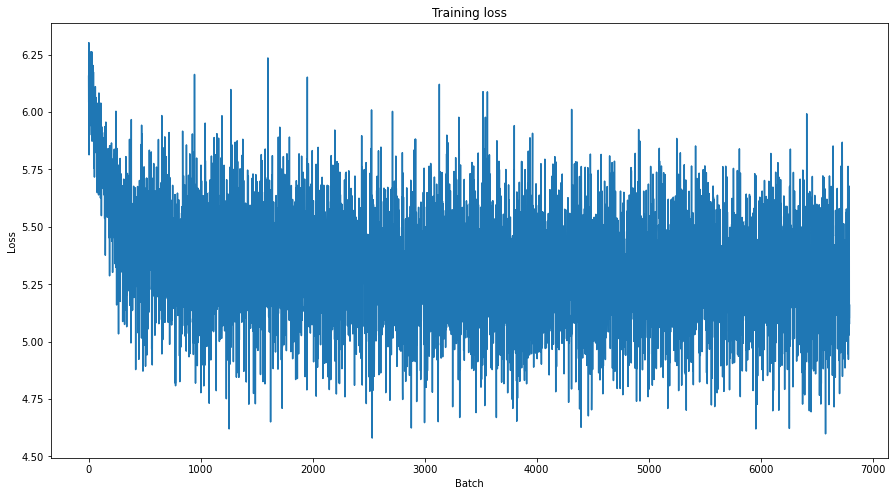

In [3]:
from utils import *

# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=2018, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
drops = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8]

use_gpu = True

for dropout_p in drops:
    config = BertConfig(vocab_size=31002, 
                        hidden_size=768, 
                        num_hidden_layers=12, 
                        num_attention_heads=12, 
                        intermediate_size=3072, 
                        hidden_act='gelu', 
                        hidden_dropout_prob=dropout_p, 
                        attention_probs_dropout_prob=0.1, 
                        max_position_embeddings=512, 
                        type_vocab_size=2, 
                        initializer_range=0.02, 
                        layer_norm_eps=1e-12, 
                        pad_token_id=0, 
                        gradient_checkpointing=False, 
                        num_labels=np.max(df['Intencion'].values)+1)
    model, device = load_classification_model(use_gpu, config)

    train_loss_set = train(model,train_dataloader, validation_dataloader,device)

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.582297364495276, 'balanced_accuracy': 0.27778802471616987}


Epoch:  13%|█▎        | 2/15 [06:22<41:21, 190.85s/it]

{'accuracy': 0.7036300348085529, 'balanced_accuracy': 0.45184114977106915}


Epoch:  20%|██        | 3/15 [09:34<38:14, 191.24s/it]

{'accuracy': 0.7772252610641472, 'balanced_accuracy': 0.568236538735419}


Epoch:  27%|██▋       | 4/15 [12:46<35:07, 191.59s/it]

{'accuracy': 0.8110392839383391, 'balanced_accuracy': 0.6561563401714001}


Epoch:  33%|███▎      | 5/15 [15:59<31:59, 191.91s/it]

{'accuracy': 0.8398806563898558, 'balanced_accuracy': 0.7443784402048098}


Epoch:  40%|████      | 6/15 [19:11<28:49, 192.12s/it]

{'accuracy': 0.8528095474888115, 'balanced_accuracy': 0.7926621967389705}


Epoch:  47%|████▋     | 7/15 [22:24<25:37, 192.25s/it]

{'accuracy': 0.8518150174042765, 'balanced_accuracy': 0.7906989129937544}


Epoch:  53%|█████▎    | 8/15 [25:36<22:25, 192.24s/it]

{'accuracy': 0.860765788165092, 'balanced_accuracy': 0.8261071775614328}


Epoch:  60%|██████    | 9/15 [28:48<19:12, 192.11s/it]

{'accuracy': 0.8647439085032322, 'balanced_accuracy': 0.8251513250820444}


Epoch:  67%|██████▋   | 10/15 [32:00<15:59, 191.95s/it]

{'accuracy': 0.8667329686723023, 'balanced_accuracy': 0.8328093538956322}


Epoch:  73%|███████▎  | 11/15 [35:11<12:47, 191.83s/it]

{'accuracy': 0.8647439085032322, 'balanced_accuracy': 0.8342680508396579}


Epoch:  80%|████████  | 12/15 [38:23<09:35, 191.72s/it]

{'accuracy': 0.8667329686723023, 'balanced_accuracy': 0.8313766488927898}


Epoch:  87%|████████▋ | 13/15 [41:34<06:23, 191.63s/it]

{'accuracy': 0.8572849328692193, 'balanced_accuracy': 0.8141934865675293}


Epoch:  93%|█████████▎| 14/15 [44:46<03:11, 191.61s/it]

{'accuracy': 0.8602685231228244, 'balanced_accuracy': 0.8223471943130942}


Epoch: 100%|██████████| 15/15 [47:57<00:00, 191.84s/it]

{'accuracy': 0.8677274987568374, 'balanced_accuracy': 0.8367565489422618}


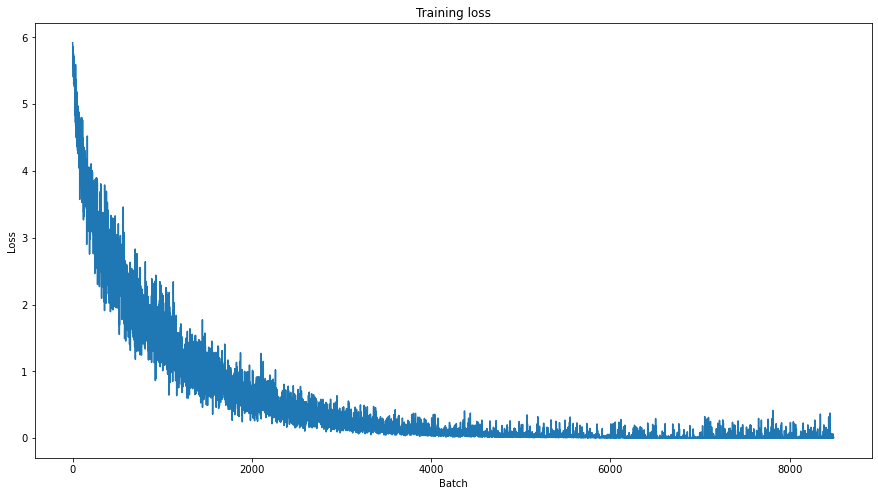

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.5166583789159622, 'balanced_accuracy': 0.22779799457802943}


Epoch:  13%|█▎        | 2/15 [06:25<41:48, 192.93s/it]

{'accuracy': 0.6568871208354052, 'balanced_accuracy': 0.3927747548107782}


Epoch:  20%|██        | 3/15 [09:39<38:35, 192.98s/it]

{'accuracy': 0.7419194430631526, 'balanced_accuracy': 0.5254749600370706}


Epoch:  27%|██▋       | 4/15 [12:51<35:22, 192.98s/it]

{'accuracy': 0.7787170561909498, 'balanced_accuracy': 0.6077142602256816}


Epoch:  33%|███▎      | 5/15 [16:05<32:10, 193.01s/it]

{'accuracy': 0.8204873197414222, 'balanced_accuracy': 0.7003737948484218}


Epoch:  40%|████      | 6/15 [19:18<28:57, 193.03s/it]

{'accuracy': 0.8359025360517156, 'balanced_accuracy': 0.7352660544735142}


Epoch:  47%|████▋     | 7/15 [22:31<25:44, 193.07s/it]

{'accuracy': 0.8408751864743909, 'balanced_accuracy': 0.7662125201237463}


Epoch:  53%|█████▎    | 8/15 [25:44<22:31, 193.05s/it]

{'accuracy': 0.8503232222774739, 'balanced_accuracy': 0.7856875388002837}


Epoch:  60%|██████    | 9/15 [28:57<19:18, 193.03s/it]

{'accuracy': 0.8577821979114868, 'balanced_accuracy': 0.7991498916925864}


Epoch:  67%|██████▋   | 10/15 [32:10<16:04, 192.96s/it]

{'accuracy': 0.8567876678269518, 'balanced_accuracy': 0.798188434247014}


Epoch:  73%|███████▎  | 11/15 [35:22<12:51, 192.80s/it]

{'accuracy': 0.8572849328692193, 'balanced_accuracy': 0.8070970507136587}


Epoch:  80%|████████  | 12/15 [38:34<09:37, 192.60s/it]

{'accuracy': 0.8577821979114868, 'balanced_accuracy': 0.8106780388758005}


Epoch:  87%|████████▋ | 13/15 [41:46<06:24, 192.43s/it]

{'accuracy': 0.8647439085032322, 'balanced_accuracy': 0.8128239253976246}


Epoch:  93%|█████████▎| 14/15 [44:58<03:12, 192.29s/it]

{'accuracy': 0.8617603182496271, 'balanced_accuracy': 0.8109546889006721}


Epoch: 100%|██████████| 15/15 [48:10<00:00, 192.70s/it]

{'accuracy': 0.8587767279960219, 'balanced_accuracy': 0.8041207090707854}


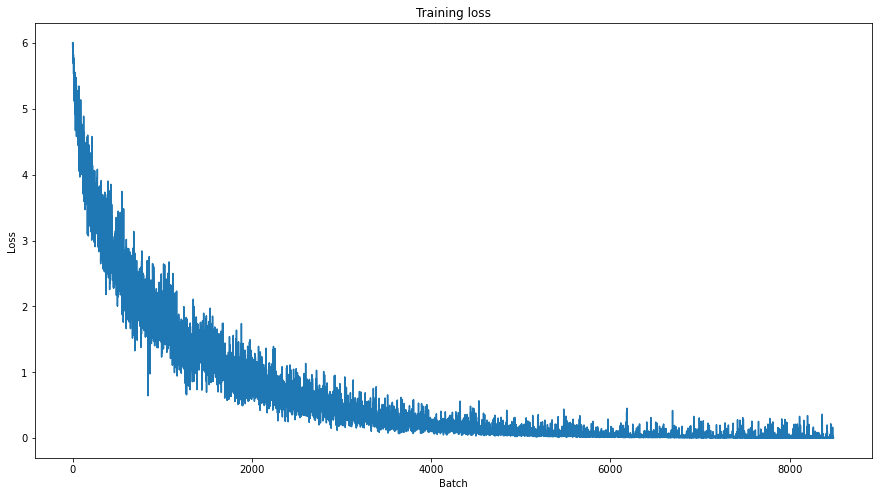

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.47289905519641967, 'balanced_accuracy': 0.16172259250684443}


Epoch:  13%|█▎        | 2/15 [06:25<41:48, 192.98s/it]

{'accuracy': 0.6220785678766783, 'balanced_accuracy': 0.3253087501456152}


Epoch:  20%|██        | 3/15 [09:38<38:35, 192.98s/it]

{'accuracy': 0.7076081551466932, 'balanced_accuracy': 0.4312219457174514}


Epoch:  27%|██▋       | 4/15 [12:51<35:22, 192.95s/it]

{'accuracy': 0.7578319244157136, 'balanced_accuracy': 0.5276794029576891}


Epoch:  33%|███▎      | 5/15 [16:04<32:09, 192.92s/it]

{'accuracy': 0.7916459472899056, 'balanced_accuracy': 0.6275097648256255}


Epoch:  40%|████      | 6/15 [19:17<28:56, 192.92s/it]

{'accuracy': 0.8219791148682247, 'balanced_accuracy': 0.6861848466224967}


Epoch:  47%|████▋     | 7/15 [22:30<25:43, 192.94s/it]

{'accuracy': 0.8403779214321233, 'balanced_accuracy': 0.7359110300750785}


Epoch:  53%|█████▎    | 8/15 [25:43<22:30, 192.94s/it]

{'accuracy': 0.8483341621084037, 'balanced_accuracy': 0.7691996347600382}


Epoch:  60%|██████    | 9/15 [28:56<19:17, 192.97s/it]

{'accuracy': 0.8533068125310791, 'balanced_accuracy': 0.7924518506522787}


Epoch:  67%|██████▋   | 10/15 [32:09<16:04, 192.96s/it]

{'accuracy': 0.8587767279960219, 'balanced_accuracy': 0.7910147532748596}


Epoch:  73%|███████▎  | 11/15 [35:22<12:51, 192.90s/it]

{'accuracy': 0.8692192938836399, 'balanced_accuracy': 0.8174450262866712}


Epoch:  80%|████████  | 12/15 [38:35<09:38, 192.86s/it]

{'accuracy': 0.8717056190949776, 'balanced_accuracy': 0.8222338737071314}


Epoch:  87%|████████▋ | 13/15 [41:47<06:25, 192.76s/it]

{'accuracy': 0.8776727996021879, 'balanced_accuracy': 0.8355638088011116}


Epoch:  93%|█████████▎| 14/15 [44:59<03:12, 192.63s/it]

{'accuracy': 0.8816509199403282, 'balanced_accuracy': 0.8369742277665038}


Epoch: 100%|██████████| 15/15 [48:12<00:00, 192.80s/it]

{'accuracy': 0.8771755345599205, 'balanced_accuracy': 0.827597870559518}


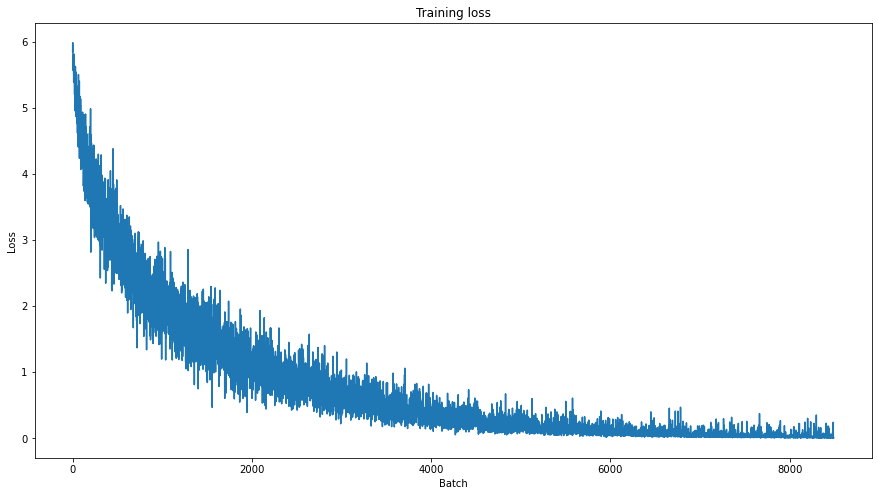

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.4172053704624565, 'balanced_accuracy': 0.11172055801501395}


Epoch:  13%|█▎        | 2/15 [06:26<41:49, 193.08s/it]

{'accuracy': 0.5514669318746892, 'balanced_accuracy': 0.22871705774813086}


Epoch:  20%|██        | 3/15 [09:39<38:37, 193.08s/it]

{'accuracy': 0.6484336151168573, 'balanced_accuracy': 0.35480999874720026}


Epoch:  27%|██▋       | 4/15 [12:52<35:23, 193.08s/it]

{'accuracy': 0.7036300348085529, 'balanced_accuracy': 0.4302800344774116}


Epoch:  33%|███▎      | 5/15 [16:05<32:10, 193.10s/it]

{'accuracy': 0.7379413227250124, 'balanced_accuracy': 0.49277154494331227}


Epoch:  40%|████      | 6/15 [19:18<28:58, 193.12s/it]

{'accuracy': 0.7792143212332173, 'balanced_accuracy': 0.5847395335325285}


Epoch:  47%|████▋     | 7/15 [22:31<25:45, 193.16s/it]

{'accuracy': 0.8000994530084535, 'balanced_accuracy': 0.6403505287224678}


Epoch:  53%|█████▎    | 8/15 [25:45<22:32, 193.16s/it]

{'accuracy': 0.8264545002486325, 'balanced_accuracy': 0.6902170224612308}


Epoch:  60%|██████    | 9/15 [28:58<19:19, 193.19s/it]

{'accuracy': 0.8463451019393337, 'balanced_accuracy': 0.7435291154563235}


Epoch:  67%|██████▋   | 10/15 [32:11<16:05, 193.18s/it]

{'accuracy': 0.8562904027846843, 'balanced_accuracy': 0.7798975814048407}


Epoch:  73%|███████▎  | 11/15 [35:24<12:52, 193.21s/it]

{'accuracy': 0.8543013426156141, 'balanced_accuracy': 0.7788900435346984}


Epoch:  80%|████████  | 12/15 [38:37<09:39, 193.22s/it]

{'accuracy': 0.8602685231228244, 'balanced_accuracy': 0.7896574444168928}


Epoch:  87%|████████▋ | 13/15 [41:51<06:26, 193.21s/it]

{'accuracy': 0.8632521133764296, 'balanced_accuracy': 0.797201766884312}


Epoch:  93%|█████████▎| 14/15 [45:04<03:13, 193.18s/it]

{'accuracy': 0.8667329686723023, 'balanced_accuracy': 0.8048296651412907}


Epoch: 100%|██████████| 15/15 [48:17<00:00, 193.16s/it]

{'accuracy': 0.8662357036300348, 'balanced_accuracy': 0.8096234568168778}


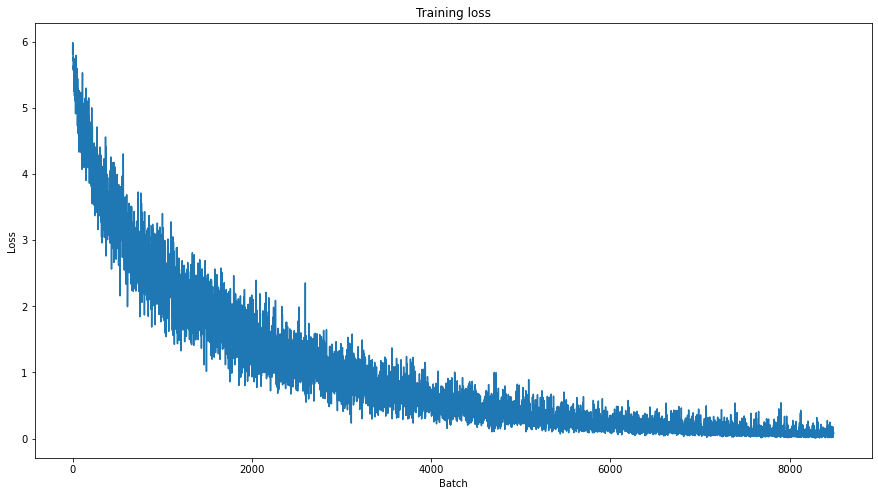

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncas

{'accuracy': 0.37692690203878665, 'balanced_accuracy': 0.08559914913134542}


Epoch:  13%|█▎        | 2/15 [06:26<41:52, 193.25s/it]

{'accuracy': 0.4922923918448533, 'balanced_accuracy': 0.16481365585288105}


Epoch:  20%|██        | 3/15 [09:39<38:39, 193.28s/it]

{'accuracy': 0.5932371954251616, 'balanced_accuracy': 0.2661995717187819}


Epoch:  27%|██▋       | 4/15 [12:53<35:26, 193.29s/it]

{'accuracy': 0.6459472899055196, 'balanced_accuracy': 0.32735488777165767}


Epoch:  33%|███▎      | 5/15 [16:06<32:13, 193.31s/it]

{'accuracy': 0.6921929388363998, 'balanced_accuracy': 0.40837532670081983}


Epoch:  40%|████      | 6/15 [19:19<28:59, 193.31s/it]

{'accuracy': 0.7125808055693684, 'balanced_accuracy': 0.4667610750249767}


Epoch:  47%|████▋     | 7/15 [22:33<25:46, 193.29s/it]

{'accuracy': 0.7434112381899552, 'balanced_accuracy': 0.5113163166922726}


Epoch:  53%|█████▎    | 8/15 [25:46<22:33, 193.29s/it]

{'accuracy': 0.7896568871208354, 'balanced_accuracy': 0.6062725858159543}


Epoch:  60%|██████    | 9/15 [28:59<19:19, 193.26s/it]

{'accuracy': 0.8010939830929885, 'balanced_accuracy': 0.645902797092473}


Epoch:  67%|██████▋   | 10/15 [32:12<16:06, 193.23s/it]

{'accuracy': 0.8254599701640974, 'balanced_accuracy': 0.7075185131899199}


Epoch:  73%|███████▎  | 11/15 [35:25<12:52, 193.18s/it]

{'accuracy': 0.8294380905022377, 'balanced_accuracy': 0.7331627685150014}


Epoch:  80%|████████  | 12/15 [38:38<09:39, 193.15s/it]

{'accuracy': 0.8458478368970661, 'balanced_accuracy': 0.7677595877550439}


Epoch:  87%|████████▋ | 13/15 [41:51<06:26, 193.14s/it]

{'accuracy': 0.8513177523620089, 'balanced_accuracy': 0.7859143471618505}


Epoch:  93%|█████████▎| 14/15 [45:05<03:13, 193.15s/it]

{'accuracy': 0.8627548483341622, 'balanced_accuracy': 0.8057858802533099}


Epoch: 100%|██████████| 15/15 [48:18<00:00, 193.22s/it]

{'accuracy': 0.8657384385877673, 'balanced_accuracy': 0.8157283789114695}


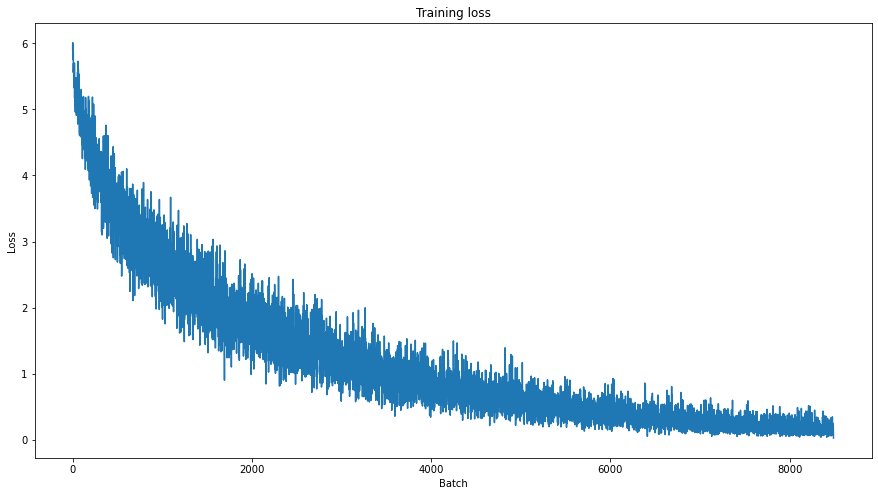

In [3]:
from utils import *

# Procesamos los datos
train_dataloader, validation_dataloader = process_dataset(df, 
                                                          max_len=128, 
                                                          random_state=2018, 
                                                          batch_size=32, 
                                                          do_lower_case=True)

# Cargamos el modelo
drops = [0.05, 0.1, 0.15, 0.2, 0.25]

use_gpu = True

for dropout_p in drops:
    config = BertConfig(vocab_size=31002, 
                        hidden_size=768, 
                        num_hidden_layers=12, 
                        num_attention_heads=12, 
                        intermediate_size=3072, 
                        hidden_act='gelu', 
                        hidden_dropout_prob=dropout_p, 
                        attention_probs_dropout_prob=0.1, 
                        max_position_embeddings=512, 
                        type_vocab_size=2, 
                        initializer_range=0.02, 
                        layer_norm_eps=1e-12, 
                        pad_token_id=0, 
                        gradient_checkpointing=False, 
                        num_labels=np.max(df['Intencion'].values)+1)
    model, device = load_classification_model(use_gpu, config)

    train_loss_set = train(model,train_dataloader, validation_dataloader,device)
    
    torch.save(model.state_dict(), './trained_models/beto_dr_{:.2f}.bin'.format(dropout_p))
    
    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

In [9]:
# Carga y descarga del modelo entrenado:
# torch.save(model.state_dict(), './bert_state_dict.bin')

# use_gpu = True
# model.load_state_dict(torch.load('./bert_state_dict.bin'))
# model.eval()

In [8]:
use_gpu = True
model.load_state_dict(torch.load('./trained_models/beto_dr_0.15.bin'))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.25, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

# Obtener resultados de test

In [9]:
input_filename = '../test_santander.csv'
output_filename = './results.csv'
get_test_results(input_filename,output_filename,model,device)